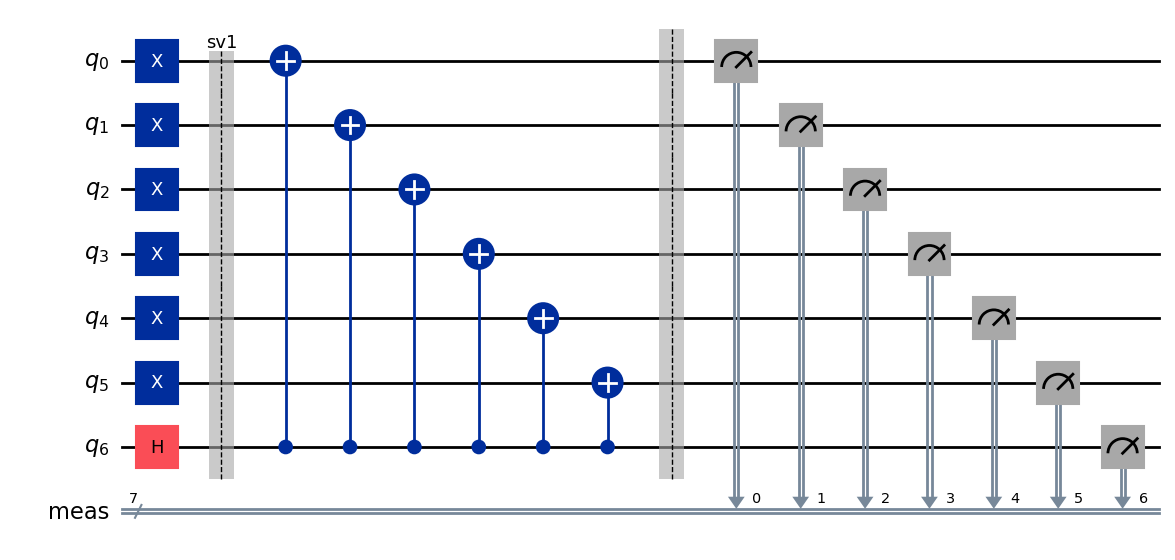

<IPython.core.display.Math object>

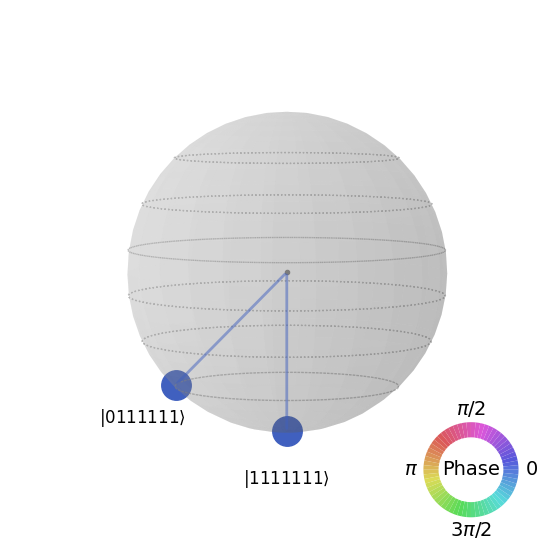

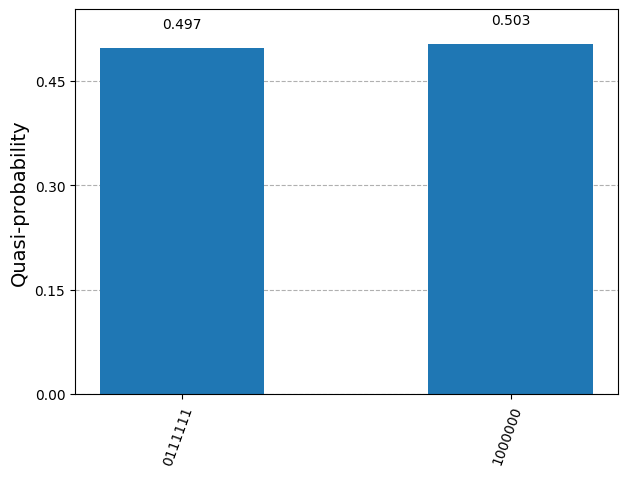

In [47]:
# quantum_circuit2.ipynb

from IPython.display import display
from qis102_utils import as_latex
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
    plot_state_qsphere,
)
from qiskit_aer import AerSimulator

# Cell 1 - Circuit to produce only two states (63 or 64 decimal)

qc = QuantumCircuit(7)

qc.h(6)
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(4)
qc.x(5)
qc.save_statevector("sv1")
qc.cx(6, 0)
qc.cx(6, 1)
qc.cx(6, 2)
qc.cx(6, 3)
qc.cx(6, 4)
qc.cx(6, 5)


qc.measure_all()


# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

sv1 = result.data(0)["sv1"]

display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))
display(plot_state_qsphere(sv1))

counts = result.get_counts(qc)
display(plot_distribution(counts))